anamoly detection : detection of anamolies in the data. for example, fradulant credit card transactions(lets say that i have made all my credit card transactions for the past 20 years inside india, now if suddenly the bank sees that a transaction is made from china, then obviously the fraud detection system will flag the transaction as fraud.)

## Isolation forest : 
    built on decision trees
    assumption : outliers are assumed to be different and few as compared to other data points

#### working of isolation forest :

an isolation forest is made up of a group of isolation trees, where each tree is a binary decision tree

first, a feature is selected from 'n' features randomly and a random threshold value is selected besed on the maxinum and minimum value of the selected feature. then each datapoint in the selected feature is divided in to 2 branches. if the datapoint is less than the threshold value, then the datapoint is placed in left side of the tree else placed in the right side of the tree. this is done for all the datapoints. this process is done till each datapoint is completely isolated or till desired depth is reached.

during scoring, each datapoint is traversed throught the trained trees and are assigned a 'anomaly score' based on the depth of the tree needed to reach that point.              'anomaly score' = -1, the datapoint is anomaly else 'anomaly score' = 1 for not anomaly  


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import LocalOutlierFactor #for local outlier factor anomaly detection

from sklearn.manifold import TSNE

from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('./creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.Class.value_counts() #0->not fraud and 1-> fraud

0    284315
1       492
Name: Class, dtype: int64

In [14]:
model = IsolationForest()
model.fit(df.drop(columns = ['Class']))
ypred = model.predict(df.drop(columns = ['Class']))

In [28]:
pd.Series(ypred).value_counts()

0    284237
1       570
dtype: int64

1 -> not anomaly      
  -1 -> anomaly

now, originally in the dataset, there were only 491 anomalies but our model has predicted ~10000 anomalies

In [26]:
# trying different values for 'contamination' parameter
# value range for 'contamination' parameter = (0, 0.5]

for i in [0.0001, 0.001, 0.1, 0.2, 0.3, 0.4, 0.5] : 
    model = IsolationForest(contamination=i)
    model.fit(df.drop(columns = ['Class']))

    ypred = model.predict(df.drop(columns=['Class']))
    print(f'\n for contamination = {i}\n')
    print(pd.Series(ypred).value_counts())
    print()


 for contamination = 0.0001

 1    284778
-1        29
dtype: int64


 for contamination = 0.001

 1    284522
-1       285
dtype: int64


 for contamination = 0.1

 1    256326
-1     28481
dtype: int64


 for contamination = 0.2

 1    227845
-1     56962
dtype: int64


 for contamination = 0.3

 1    199365
-1     85442
dtype: int64


 for contamination = 0.4

 1    170884
-1    113923
dtype: int64


 for contamination = 0.5

 1    142404
-1    142403
dtype: int64



out of all the values for the 'contamination' parameter, the best performing one is 0.001 as those values are closest to the original values. maybe we can also try 0.002, 0.0009, etc



In [7]:
model = IsolationForest(contamination = 0.002)
model.fit(df.drop(columns = ['Class']))

ypred = model.predict(df.drop(columns = ['Class']))

ypred = pd.Series(ypred)
ypred = ypred.map({1 : 0, -1 : 1})

from sklearn.metrics import accuracy_score
accuracy_score(df.Class, ypred)

0.9973525931595782

with contamination = 0.002, we get aroung ~99.7 % accuracy

### DBSCAN for anomaly detection

In [3]:
df.shape

(284807, 31)

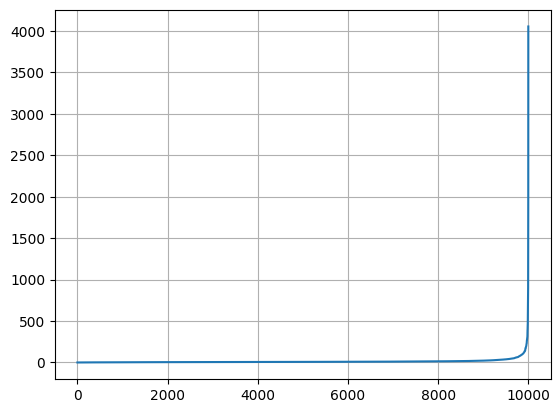

In [7]:
minpoints = 2 * 30

df_cp = df.drop(columns = ['Class'])

# k-distance graph
neighbors = NearestNeighbors(n_neighbors=minpoints)
neighbors_fit = neighbors.fit(df_cp[:10000]) #using all data takes long time
distances, indices = neighbors_fit.kneighbors(df_cp[:10000])

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.grid(which='both')
plt.show()

# epsilon values turns out to be around 150

In [18]:
epsilon = 150

dbscan = DBSCAN(eps=epsilon, min_samples=minpoints)
dbscan.fit(df_cp)

DBSCAN(eps=150, min_samples=60)

In [19]:
ypred = dbscan.labels_
ypred = pd.Series(ypred)

In [20]:
ypred.value_counts()

 5    137003
 9    124227
-1     12573
 0      9569
 6       774
 1       159
 7       141
 8       108
 3       103
 4        88
 2        62
dtype: int64

here, -1 is the anomalies but it is way higher than what we have in the original dataset. so, we need experiment with different values of epsilon

## local outlier factor anamoly detection : 

detects both local and global outliers.
 
local outliers : outliers that are near a cluster but not a part of the cluster. they are near to other datapoints but the average distance between the local outliers and other datapoints is more as compared to the average distance between the other datapoints.

global outliers : outliers that is far away from other data points.

![alt text](<local outlier factor detection.png>)

local outlier factor anomaly detection uses 'k nearest neighbors' algorithm to calculate the average distance between the datapoints and classifies then as outliers or not.



In [3]:
data = load_breast_cancer()
x = data.data
y = data.target

In [4]:
x = StandardScaler().fit_transform(x)

In [5]:
lof = LocalOutlierFactor(n_neighbors=20)
lof.fit(x)

LocalOutlierFactor()

In [6]:
lof.negative_outlier_factor_  # outlier score for each datapoint. the smaller the number, the more outlier they are.

array([-1.37063883, -1.04900658, -1.00465356, -1.84981795, -1.144804  ,
       -1.08066595, -0.99538794, -1.04353394, -1.06242036, -1.65569052,
       -1.0824647 , -1.01894949, -1.61636405, -1.19687281, -1.14121428,
       -1.11659342, -1.01793488, -1.02830247, -1.05659535, -1.02865177,
       -1.03880952, -1.09029848, -1.32789083, -1.08055238, -1.05009644,
       -1.37782688, -1.08399437, -1.03030057, -1.03786061, -1.01631619,
       -1.0141982 , -1.17112259, -1.02531744, -1.08506508, -1.03877849,
       -1.14288456, -1.01621999, -1.28989487, -2.03267551, -1.02505545,
       -1.03231062, -1.21018896, -1.50181417, -1.01764644, -1.07553744,
       -1.07783091, -1.11482817, -1.0149651 , -1.01706803, -1.00443871,
       -1.002368  , -0.9895301 , -0.99397194, -1.05793858, -1.03993657,
       -1.06223061, -0.99494468, -0.99749612, -1.05396985, -1.22261215,
       -1.52570578, -1.24169661, -1.14203166, -1.3958629 , -1.00536556,
       -0.9996208 , -1.0788806 , -1.01539145, -1.93880256, -1.00

In [7]:
result = lof.fit_predict(x)

In [8]:
result = pd.Series(result)
result.value_counts()  # -1 -> outlier    1 -> not outlier

 1    538
-1     31
dtype: int64

our model has predicted 31 points are anomaly in the data

In [9]:
x.shape

(569, 30)

In [10]:
# we have 30 independent features. how to visualize such high dimensional data? we use TSNE to transform 30 dimensions to 2 dimensions so that its easier to visualize.

tsne = TSNE(n_components=2, random_state = 1)
x_tsne = tsne.fit_transform(x)

[]

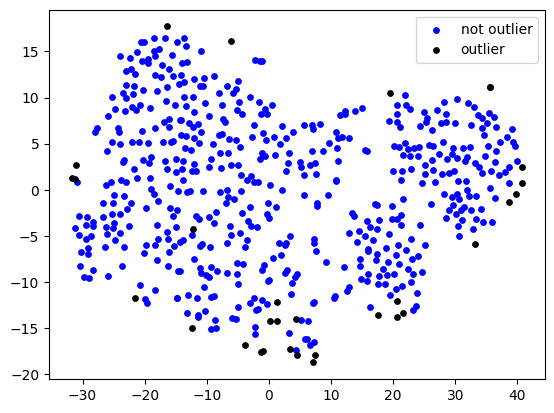

In [17]:
import matplotlib.colors

colors = ['black', 'lightblue']
plt.scatter(x_tsne[result == 1][:,0], x_tsne[result == 1][:,1], c = 'blue', label = 'not outlier', s = 15)
plt.scatter(x_tsne[result == -1][:,0], x_tsne[result == -1][:,1], c = 'black', label = 'outlier', s = 15)
plt.legend()
plt.plot()

NOTE : this is not perfect distrubution of the data, we are just looking at the projection of 30 features in the 2 dimentional space